# Sequential Modeling and RNNs

## Sequential Data

At its simplest, sequential data is just a list of items arranged in order. It is inherently ordered, meaning that the position of each element matters. Whether you're forecasting the weather or predicting stock market trends, understanding how each element in the sequence relates to its predecessors is key. The challenge lies in capturing the relationships between these items to make accurate predictions.

### Examples of Sequential Data

Consider these real-world applications where sequential data is fundamental:

- **Weather Forecasting:** Predicting future conditions based on historical weather patterns.
- **Stock Market Trends:** Analyzing time series data of stock prices.
- **Autocomplete for Text:** Suggesting the next word or phrase while you type.
- **Genetic Sequencing:** Interpreting the order of nucleotides in DNA.
- **Speech Recognition:** Transcribing spoken language by understanding sequential audio signals.
- **Video Frame Prediction:** Forecasting the next frame in a video sequence.
- **Music Composition:** Generating sequences of musical notes that form a coherent melody.


### Two Main Goals with Sequential Data

1. **Computing the Probability of a Sequence:**  
   The goal is to determine the likelihood that a particular sequence of events or items occurs. This involves calculating the probability of each element in the context of those that came before it.

2. **Predicting the Next Item in a Sequence:**  
   Given a history of previous items, we want to forecast what the next item will be. This is critical for tasks like text autocomplete or predicting market trends.

![](https://upload.wikimedia.org/wikipedia/commons/a/a7/Random_vs_sequential_access.svg)

## Reviewing Probability Concepts


### Conditional Probability

Conditional probability is all about context - it tells us the probability of an event occurring given that another event has already happened. Mathematically, if we have two events $A$ and $B$, the conditional probability of $B$ given $A$ is defined as:

$$
P(B \mid A) = \frac{P(A, B)}{P(A)}
$$

This formula assumes that $P(A)$ is not zero. It tells us how likely $B$ is to occur when we already know that $A$ has occurred. In sequential data, this means that the probability of seeing a certain word, for example, may depend on the words that came before it.


### The Chain Rule

The chain rule of probability is a tool that allows us to break down the probability of a long sequence into a product of conditional probabilities. Suppose you have a sequence of items $x_1, x_2, \dots, x_n$. The chain rule states that the joint probability of the entire sequence can be expressed as:

$$
P(x_1, x_2, \dots, x_n) = P(x_1) \times P(x_2 \mid x_1) \times P(x_3 \mid x_1, x_2) \times \cdots \times P(x_n \mid x_1, x_2, \dots, x_{n-1})
$$

By decomposing a complex joint probability into manageable pieces, we can handle the computation more effectively. 

#### Step-by-Step Explanation

1. **Start Simple:**  
   The first term $P(x_1)$ is the probability of the first item in the sequence. There’s no history, so it stands alone.

2. **Build Context:**  
   For the second item, $P(x_2 \mid x_1)$ tells us the probability of $x_2$ occurring after $x_1$. It captures how $x_1$ influences $x_2$.

3. **Continuing the Sequence:**  
   For the third item, $P(x_3 \mid x_1, x_2)$ incorporates the context of both previous items, and so on. Each term adds more context, making the overall model richer.


### Challenges

While the chain rule provides a clean theoretical framework, real-world applications often run into two major issues:

1. **Computational Complexity:**
   - **Too Many Parameters:**  
     With longer sequences, the number of possible combinations of previous items becomes enormous. This leads to a combinatorial explosion in the number of conditional probabilities that need to be estimated, making it computationally expensive or even infeasible to model every possible sequence.

2. **Generalization to Unseen Data:**
   - **Data Sparsity:**  
     Since it’s impractical to encounter every possible sequence during training, models often face situations where they must predict probabilities for sequences or elements they have never seen before.
   - **Zero-Probability Problem:**  
     If a sequence or a particular context has not been observed during training, the model might erroneously assign it a probability of zero, even though the sequence could be perfectly plausible.


## Markov Models

Markov Models are one of the earliest and simplest approaches to modeling sequential data. They are built on a key assumption: the **Markov Assumption**.

### The Markov Assumption

At its core, the Markov Assumption states that the future state depends only on a limited part of the past. In other words, once you know the present (or a limited number of previous states), you don't need the entire history to predict the future. This assumption simplifies the modeling process by limiting the context window we need to consider when predicting the next item.

This idea can be expressed mathematically:

- For a **First Order Markov Model**:

$$
P(x_t \mid x_1, x_2, \dots, x_{t-1}) \approx P(x_t \mid x_{t-1})
$$

- For a **Second Order Markov Model**:

$$
P(x_t \mid x_1, x_2, \dots, x_{t-1}) \approx P(x_t \mid x_{t-2}, x_{t-1})
$$


### First Order Markov Model

In a first order Markov model, the current state depends solely on the immediately preceding state. For example, when modeling weather, one might assume that tomorrow's weather depends only on today's weather, not on the weather of days before today.

#### How It Works

- **State Representation:**  
  Each state represents a possible condition or observation (e.g., "Sunny", "Cloudy", "Rainy").

- **Transition Probabilities:**  
  The model uses a transition matrix where each entry represents the probability of moving from one state to another. The current state completely encapsulates the necessary context for predicting the next state.

#### Example

In [1]:
import random

# Define the states and transition probabilities.
states = ["Sunny", "Cloudy", "Rainy"]
transition_matrix = {
    "Sunny": {"Sunny": 0.7, "Cloudy": 0.2, "Rainy": 0.1},
    "Cloudy": {"Sunny": 0.3, "Cloudy": 0.4, "Rainy": 0.3},
    "Rainy": {"Sunny": 0.2, "Cloudy": 0.3, "Rainy": 0.5}
}

def next_state(current_state):
    next_probs = transition_matrix[current_state]
    next_states = list(next_probs.keys())
    probabilities = list(next_probs.values())
    return random.choices(next_states, probabilities)[0]

# Simulate a sequence of weather states
current_state = "Sunny"
sequence = [current_state]
for _ in range(10):
    current_state = next_state(current_state)
    sequence.append(current_state)

print("Simulated Weather Sequence:")
print(sequence)

Simulated Weather Sequence:
['Sunny', 'Rainy', 'Cloudy', 'Rainy', 'Rainy', 'Rainy', 'Cloudy', 'Cloudy', 'Rainy', 'Sunny', 'Rainy']


### Second Order Markov Model

A second order Markov model extends the first order idea by considering the two most recent states instead of just the one. This allows for a slightly richer context when predicting the next state. For instance, the weather tomorrow might depend on both today’s and yesterday’s weather.

#### How It Works

- **State Representation:**  
  In a second order model, each "state" becomes a pair of consecutive observations (e.g., ("Sunny", "Cloudy")).

- **Transition Probabilities:**  
  Transition probabilities are defined for these pairs transitioning to the next state. This added context can provide better predictions in some scenarios, though it also increases the number of parameters required.

#### Example

In [2]:
import random

# Define the states
states = ["Sunny", "Cloudy", "Rainy"]

# Define the transition probabilities for a second order Markov model.
# The keys are tuples representing the previous two states,
# and the values are dictionaries mapping the next state to its probability.

transition_matrix = {
    ("Sunny", "Sunny"): {"Sunny": 0.6, "Cloudy": 0.3, "Rainy": 0.1},
    ("Sunny", "Cloudy"): {"Sunny": 0.3, "Cloudy": 0.4, "Rainy": 0.3},
    ("Sunny", "Rainy"): {"Sunny": 0.2, "Cloudy": 0.3, "Rainy": 0.5},
    ("Cloudy", "Sunny"): {"Sunny": 0.5, "Cloudy": 0.3, "Rainy": 0.2},
    ("Cloudy", "Cloudy"): {"Sunny": 0.2, "Cloudy": 0.5, "Rainy": 0.3},
    ("Cloudy", "Rainy"): {"Sunny": 0.1, "Cloudy": 0.3, "Rainy": 0.6},
    ("Rainy", "Sunny"): {"Sunny": 0.3, "Cloudy": 0.4, "Rainy": 0.3},
    ("Rainy", "Cloudy"): {"Sunny": 0.2, "Cloudy": 0.4, "Rainy": 0.4},
    ("Rainy", "Rainy"): {"Sunny": 0.1, "Cloudy": 0.3, "Rainy": 0.6}
}

def next_state(prev_state, current_state):
    # Get the transition probabilities based on the last two states
    next_probs = transition_matrix[(prev_state, current_state)]
    next_states = list(next_probs.keys())
    probabilities = list(next_probs.values())
    return random.choices(next_states, probabilities)[0]

# Initialize the sequence with two states.
initial_state1 = "Sunny"
initial_state2 = "Cloudy"
sequence = [initial_state1, initial_state2]

# Generate the rest of the sequence
for _ in range(10):
    next_st = next_state(sequence[-2], sequence[-1])
    sequence.append(next_st)

print("Simulated Weather Sequence (Second Order):")
print(sequence)

Simulated Weather Sequence (Second Order):
['Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Sunny', 'Cloudy', 'Sunny', 'Cloudy', 'Cloudy', 'Cloudy', 'Rainy', 'Rainy']


### Limitations of Markov Models

Despite their simplicity and ease of understanding, Markov models come with several limitations:

- **Finite Context:**  
  Because the model only considers a fixed number of previous states, it is unable to capture long-term dependencies. This finite context might be insufficient for tasks where earlier events have a significant influence on future outcomes.

- **Lack of Memory:**  
  Markov models inherently have no memory beyond their defined order. They cannot retain information about events outside of the fixed context window, such as long-term trends or seasonal effects in data.

- **Stationarity Assumption:**  
  Markov models assume that the transition probabilities remain constant over time. In many real-world situations, the underlying data-generating processes may change, which can reduce the effectiveness of the model if these changes are not taken into account.


## RNNs – Recurrent Neural Networks

Recurrent Neural Networks (RNNs) are a powerful class of neural networks specifically designed to handle sequential data. Unlike traditional feedforward networks that assume each input is independent, RNNs introduce a notion of "memory" through a hidden state that is recursively updated. This allows them to capture information from previous inputs, making them well-suited for tasks where context matters.

![](FNN_RNN.png)

### Residual Neural Networks (ResNets) vs. RNNs (Recurrent Neural Networks)

**Residual Neural Networks (ResNets)** are a type of feedforward convolutional neural network (CNN) architecture, primarily used for image recognition, classification, and other computer vision tasks. What distinguishes ResNets is the introduction of skip connections (or shortcut connections), which allow the network to bypass one or more layers. 
- The skip connections help mitigate the vanishing gradient problem by allowing gradients to flow directly through the network during backpropagation. 
- Instead of learning the full mapping from input to output, each residual block learns a residual function — essentially the difference between the input and the output.
- ResNets enable the training of very deep networks (e.g., with 50, 101, or even 152 layers) without suffering from degradation in performance.

**Recurrent Neural Networks (RNNs)**, on the other hand, are designed for sequential or time-series data such as text, audio, or stock prices. They maintain a hidden state that is passed from one time step to the next, giving them a form of memory and allowing them to capture temporal dependencies.
- Each step of the sequence shares the same weights, enabling the model to process input of variable lengths.
- RNNs suffer from vanishing/exploding gradients over long sequences, which led to the development of improved variants like LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) networks.
- Commonly used in language modeling, speech recognition, and sequence prediction tasks.

### How RNNs Work

At each time step, an RNN takes an input (e.g., a word or a data point) and combines it with its hidden state from the previous time step to produce a new hidden state. This process can be expressed mathematically as:

$$
h_t = f(W_{xh} \, x_t + W_{hh} \, h_{t-1} + b_h)
$$

where:
- $x_t$ is the input at time $t$,
- $h_t$ is the hidden state at time $t$,
- $W_{xh}$ and $W_{hh}$ are weight matrices,
- $b_h$ is a bias term,
- $f$ is an activation function (such as tanh or ReLU).

The key idea is that the hidden state $h_t$ carries information from previous time steps, allowing the network to maintain a form of memory. This recursive update mechanism enables RNNs to handle varying context sizes without needing a fixed-length input.

![](RNN_Representation.png)

### Auto-Regressive Models

RNNs are inherently auto-regressive models. This means that they predict the value at time $t$ based on a function of the previous values (e.g., $t-1$, $t-2$, etc.). In the context of language modeling, the probability of a sequence is modeled as:

$$
P(x_1, x_2, \dots, x_T) = \prod_{t=1}^{T} P(x_t \mid x_1, x_2, \dots, x_{t-1})
$$

The auto-regressive property enables RNNs to generate coherent sequences, as each prediction is conditioned on the sequence generated so far.

### Generating Sequences Using RNNs

One common application of RNNs is sequence generation. For instance, when generating text, an RNN is trained to predict the next word given a sequence of previous words. During generation, the network outputs a probability distribution over the vocabulary at each step, and a word is chosen (often in an auto-regressive manner) to be fed back into the network for the next prediction.

A simplified conceptual flow for generating a sentence is as follows:
1. **Initialization:** Start with a seed word or sequence.
2. **Prediction:** Use the RNN to predict the probability of each possible next word.
3. **Selection:** Pick the next word based on the probability distribution.
4. **Recursion:** Feed the chosen word back into the RNN and repeat until a stopping condition (like a special end-of-sequence token) is reached.

#### Example

In this example, the network is trained to predict the next token given a sequence. The generate_sequence function demonstrates the auto-regressive generation process by feeding back each predicted token into the model.

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Example parameters
vocab_size = 5000      # size of our vocabulary
embedding_dim = 64
rnn_units = 128
sequence_length = 30   # length of input sequences

# Build a simple RNN model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=sequence_length),
    SimpleRNN(rnn_units),
    Dense(vocab_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Assume you have your training data ready in variables `input_sequences` and `target_words`
# For demonstration, we use random data:
input_sequences = np.random.randint(0, vocab_size, (1000, sequence_length))
target_words = np.random.randint(0, vocab_size, (1000,))

model.fit(input_sequences, target_words, epochs=3, batch_size=64)

# Auto-Regressive Generation
def generate_sequence(model, seed_seq, num_tokens):
    generated = list(seed_seq)
    for _ in range(num_tokens):
        # Ensure the input is of the proper sequence length
        input_seq = np.array(generated[-sequence_length:]).reshape(1, -1)
        preds = model.predict(input_seq, verbose=0)[0]
        # Choose the most probable token (or sample from the distribution)
        next_token = np.argmax(preds)
        generated.append(next_token)
    return generated

# Generate a sequence using a random seed
seed_seq = list(np.random.randint(0, vocab_size, sequence_length))
generated_seq = generate_sequence(model, seed_seq, num_tokens=20)
print("Generated Sequence with RNN:", generated_seq)


2025-03-03 15:55:37.226896: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-03 15:55:44.819653: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/3
16/16 [==============================] - 2s 21ms/step - loss: 8.5178
Epoch 2/3
16/16 [==============================] - 0s 20ms/step - loss: 7.8444
Epoch 3/3
16/16 [==============================] - 0s 18ms/step - loss: 7.1248
Generated Sequence with RNN: [2041, 3989, 895, 3355, 1323, 4535, 1648, 3064, 3901, 1617, 3923, 3615, 2982, 3681, 281, 2468, 2265, 2644, 1793, 3102, 649, 1204, 1471, 513, 2857, 1378, 2057, 2021, 1616, 3874, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410, 410]


### Stacked RNNs

For more complex tasks, a single RNN layer might not capture all the nuances of the data. **Stacked RNNs** address this by employing multiple layers of RNNs. In a stacked RNN, the hidden states produced by one layer become the inputs for the next layer. This allows the network to learn hierarchical representations of the data:
- **Lower layers** may capture local, short-term dependencies.
- **Higher layers** may capture more abstract, long-term patterns.

Stacking layers can greatly enhance the model's ability to understand complex sequential patterns, though it requires more computational resources and can make training more challenging.

#### Example

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Example parameters
vocab_size = 5000
embedding_dim = 64
rnn_units = 128
sequence_length = 30

# Build a stacked RNN model with two RNN layers
stacked_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=sequence_length),
    SimpleRNN(rnn_units, return_sequences=True),  # returns output at each time step
    SimpleRNN(rnn_units),  # only returns the last output
    Dense(vocab_size, activation='softmax')
])

stacked_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Use the same random data as before for demonstration:
input_sequences = np.random.randint(0, vocab_size, (1000, sequence_length))
target_words = np.random.randint(0, vocab_size, (1000,))

stacked_model.fit(input_sequences, target_words, epochs=3, batch_size=64)

# Generating a sequence from the stacked model is similar to before:
def generate_sequence_stacked(model, seed_seq, num_tokens):
    generated = list(seed_seq)
    for _ in range(num_tokens):
        input_seq = np.array(generated[-sequence_length:]).reshape(1, -1)
        preds = model.predict(input_seq, verbose=0)[0]
        next_token = np.argmax(preds)
        generated.append(next_token)
    return generated

seed_seq = list(np.random.randint(0, vocab_size, sequence_length))
generated_seq = generate_sequence_stacked(stacked_model, seed_seq, num_tokens=20)
print("Generated Sequence with Stacked RNN:", generated_seq)

2025-03-03 16:54:14.971179: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-03 16:54:20.173872: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/3
16/16 [==============================] - 3s 42ms/step - loss: 8.5196
Epoch 2/3
16/16 [==============================] - 1s 33ms/step - loss: 7.6668
Epoch 3/3
16/16 [==============================] - 0s 30ms/step - loss: 6.9996
Generated Sequence with Stacked RNN: [508, 4308, 2310, 4743, 934, 2476, 4721, 2064, 1699, 3853, 1600, 2155, 1112, 2120, 2796, 1250, 3541, 4650, 4067, 905, 3729, 2400, 1857, 3407, 1798, 1857, 1379, 396, 3682, 159, 2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026, 2026]


## Other Options: LSTM and GRU

Standard RNNs can struggle with learning long-term dependencies due to issues like vanishing and exploding gradients. Two popular alternatives have been developed to address these challenges:

- **LSTM (Long Short-Term Memory):**  
  LSTMs introduce gating mechanisms (input, forget, and output gates) that allow the network to control the flow of information and maintain long-term dependencies more effectively.

- **GRU (Gated Recurrent Unit):**  
  GRUs are a simplified version of LSTMs that combine the forget and input gates into a single update gate. They are often faster to train and can perform comparably well on many tasks.



### LSTM Example

LSTM (Long Short-Term Memory) networks are a variant of RNNs designed to overcome the vanishing gradient problem and better capture long-term dependencies. They use gating mechanisms (input, forget, and output gates) to control the flow of information.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Example parameters
vocab_size = 5000
embedding_dim = 64
lstm_units = 128
sequence_length = 30

# Build a simple LSTM model
lstm_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=sequence_length),
    LSTM(lstm_units),
    Dense(vocab_size, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Again, using random data for demonstration
input_sequences = np.random.randint(0, vocab_size, (1000, sequence_length))
target_words = np.random.randint(0, vocab_size, (1000,))

lstm_model.fit(input_sequences, target_words, epochs=3, batch_size=64)

# Auto-Regressive Generation for LSTM
def generate_sequence_lstm(model, seed_seq, num_tokens):
    generated = list(seed_seq)
    for _ in range(num_tokens):
        input_seq = np.array(generated[-sequence_length:]).reshape(1, -1)
        preds = model.predict(input_seq, verbose=0)[0]
        next_token = np.argmax(preds)
        generated.append(next_token)
    return generated

seed_seq = list(np.random.randint(0, vocab_size, sequence_length))
generated_seq = generate_sequence_lstm(lstm_model, seed_seq, num_tokens=20)
print("Generated Sequence with LSTM:", generated_seq)


Epoch 1/3
16/16 [==============================] - 3s 44ms/step - loss: 8.5171
Epoch 2/3
16/16 [==============================] - 1s 42ms/step - loss: 8.3309
Epoch 3/3
16/16 [==============================] - 1s 42ms/step - loss: 7.5151
Generated Sequence with LSTM: [1946, 574, 3982, 789, 1761, 3594, 1466, 4348, 4689, 1863, 733, 4377, 2897, 4716, 2403, 2770, 2739, 2831, 1955, 4915, 3913, 3152, 4112, 16, 508, 3553, 653, 297, 4136, 4177, 3840, 3840, 3840, 3840, 3840, 3840, 3840, 3840, 3840, 3840, 3840, 3840, 3840, 3840, 3840, 3840, 3840, 3840, 3840, 3840]


### Comparison

**Basic RNN vs. LSTM:**  
Both models work in an auto-regressive fashion to generate sequences. However, LSTM networks include internal gating mechanisms that allow them to better remember information over longer sequences. This means that while a simple RNN may struggle with longer context due to vanishing gradients, an LSTM is more robust in capturing long-term dependencies.

**Model Complexity:**  
LSTM units are more complex than SimpleRNN cells because they maintain additional parameters (gates) to control memory. This typically results in better performance on tasks requiring long-term context, at the cost of increased computational resources.

**Stacked Architectures:**  
Just as with RNNs, LSTMs can also be stacked to further enhance learning. The approach is nearly identical—using the `return_sequences=True` parameter to ensure that intermediate LSTM layers pass their full sequence outputs to the next layer.

## Full Example: Using The Shakespeare Dataset

### TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import os

2025-03-03 16:28:48.898626: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Download And Prepare The Data

In [2]:
# Download the Shakespeare text
path_to_file = tf.keras.utils.get_file("shakespeare.txt",
                                       "https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt")
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

print("Length of text:", len(text))
print(text[0:300])

Length of text: 1115394
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us


In [3]:
# Create a vocabulary from the text
vocab = sorted(set(text))
vocab_size = len(vocab)
print("Unique characters:", vocab_size)

Unique characters: 65


In [4]:
# Map characters to indices and vice versa
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
text_as_int = np.array([char2idx[c] for c in text])

#### Prepare The Dataset For TensorFlow

In [5]:
# Create training examples and targets
seq_length = 100
examples_per_epoch = len(text) // (seq_length + 1)

# Create a TensorFlow Dataset of character sequences
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

2025-03-03 16:28:58.088913: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Build And Train The Model

In [6]:
# Batch and shuffle the data
BATCH_SIZE = 64
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Build a stacked RNN model (using two SimpleRNN layers)
embedding_dim = 256
rnn_units = 1024

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[BATCH_SIZE, None]),
    tf.keras.layers.SimpleRNN(rnn_units, return_sequences=True, stateful=True,
                              recurrent_initializer='glorot_uniform'),
    tf.keras.layers.SimpleRNN(rnn_units, return_sequences=True, stateful=True,
                              recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

# Train the model (for demonstration, we train for a few epochs)
model.fit(dataset, epochs=3)

# Save the weights after training
model.save_weights('shakespeare_weights.h5')

Epoch 1/3
172/172 [==============================] - 296s 2s/step - loss: 3.4235
Epoch 2/3
172/172 [==============================] - 237s 1s/step - loss: 2.7515
Epoch 3/3
172/172 [==============================] - 247s 1s/step - loss: 2.2415


#### Generate Text

In [7]:
# Rebuild the model for inference with batch size 1
inference_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[1, None]),
    tf.keras.layers.SimpleRNN(rnn_units, return_sequences=True, stateful=True,
                              recurrent_initializer='glorot_uniform'),
    tf.keras.layers.SimpleRNN(rnn_units, return_sequences=True, stateful=True,
                              recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
])

# Load the weights into the inference model
inference_model.load_weights('shakespeare_weights.h5')

# Make sure to build the model
inference_model.build(tf.TensorShape([1, None]))

def generate_text(model, start_string, num_generate=500):
    # Convert start string to numbers (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    
    text_generated = []
    temperature = 1.0  # Lower temperature results in more predictable text
    
    model.reset_states()
    for _ in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()
        
        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])
        
    return start_string + ''.join(text_generated)

print(generate_text(inference_model, start_string="ROMEO: "))


ROMEO: YZO&$G&G&&&&R$&ZJ$&&&&G&$&&3W&G$$V&3VZK$&&&$&&R&G&$&&&RI&F$JG&&$&$$&&$$&&&$$&$&&&&&&&&&N&&&$x$c$J$&&&&g&&&&$$&&&&&&&V&RY$j&$&&$X3Z&&N$$z&$G&&&3$&SY$R-&NV$&$Z&&&$$&MGVV&&&KV$$$$F&&X&&&&F3Z&&&R3GJ&$&N&&SY$&&&&$&&BJ&PB&&&$&&$&&$&&&&&v&$$&$$&&&$$&N$$NG&$&N&&W$&&&&CIORP$&$$&R&&$X$&&$G&Z$&&NF$&&$C&&3$$&W&&&&&&K$$PG$j$V$CBJ&&MZ&&V$W$$&N$$z$XJ$M&J$&&3TW&RQ&$&$&$&&&RS$&&G$$&n$$&&R&R3K$$&$&&$$$&&&S$$&$&&$$S$$$$&&&&$$&&&&$&RG&&VUS&JRY$&&Z$&&&$$z&J&VG$$O&&Z&&&&&&&G$I$&$&&&P&&$&&&&F&&$&$&&M&X&&&&&NCE&&J&M&$B


#### What is happening with the output?

The gibberish output is most likely due to one or more of the following factors:

1. **Insufficient Training:**  
   Training for only a few epochs (e.g., 3 epochs in the example) on a complex dataset like Shakespeare might not be enough for the model to learn coherent patterns. Increasing the number of epochs can help the model learn more meaningful representations.

2. **Temperature Parameter:**  
   The temperature parameter in the text generation function controls the randomness of the predictions. A higher temperature (e.g., 1.0 or above) produces more random outputs, while a lower temperature (e.g., 0.5) makes the model's predictions more conservative. Try lowering the temperature to see if it results in more coherent text.

3. **Model Architecture and Capacity:**  
   Although stacking RNN layers increases the model’s capacity, the architecture might still require tuning (e.g., number of units, number of layers) to better capture the complexity of the data. Experimenting with different architectures or even switching to LSTM/GRU (which tend to handle long-range dependencies better) might yield better results.

4. **Preprocessing and Data Quality:**  
   Ensure that your data preprocessing is done correctly. For character-level models, even small issues in tokenization or data batching can affect output quality.

5. **Stateful vs. Stateless Training:**  
   Stateful RNNs require careful handling of state between batches. When generating text, make sure the state is correctly reset and that the inference model is built with the appropriate batch size (as done with the inference model). If there’s any mismatch, the output can suffer.

#### How can we improve it? 

- **Train for More Epochs:**  
  Increase the number of epochs significantly. Models trained on large text corpora like Shakespeare usually require many epochs (tens to hundreds) to generate coherent output.
  
- **Adjust the Temperature:**  
  Experiment with lowering the temperature in the `generate_text` function. For example, try setting `temperature = 0.5` or even lower to see if the output improves.
  
- **Experiment with Model Variants:**  
  - Try using LSTM layers instead of SimpleRNN layers.
  - Alternatively, use a GRU, which might offer a balance between complexity and performance.
  
- **Check the Data Pipeline:**  
  Make sure the data is being batched and fed to the model correctly. An issue in data preparation can propagate through and affect the generated output.

By fine-tuning these factors, you should be able to get more coherent text generation from your model.


### PyTorch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import requests

#### Download And Prepare The Data

In [2]:
# Download the Shakespeare text
url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
response = requests.get(url)
text = response.text
print("Length of text:", len(text))

Length of text: 1115394


In [3]:
# Create a vocabulary from the text
vocab = sorted(set(text))
vocab_size = len(vocab)
print("Unique characters:", vocab_size)

Unique characters: 65


In [4]:
# Map characters to indices and vice versa
char2idx = {ch: i for i, ch in enumerate(vocab)}
idx2char = np.array(vocab)
text_as_int = np.array([char2idx[c] for c in text], dtype=np.int64)

#### Prepare The Dataset For PyTorch

In [5]:
# Create sequences from the text
seq_length = 100
input_sequences = []
target_sequences = []
for i in range(0, len(text_as_int) - seq_length):
    input_sequences.append(text_as_int[i:i+seq_length])
    target_sequences.append(text_as_int[i+1:i+seq_length+1])
input_sequences = np.array(input_sequences)
target_sequences = np.array(target_sequences)

# Create a custom dataset
class TextDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets
    def __len__(self):
        return len(self.inputs)
    def __getitem__(self, idx):
        return torch.tensor(self.inputs[idx]), torch.tensor(self.targets[idx])

dataset = TextDataset(input_sequences, target_sequences)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

#### Build And Train The Model

In [ ]:
# Define a stacked RNN model using nn.RNN
class StackedRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, rnn_units, num_layers=2):
        super(StackedRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, rnn_units, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(rnn_units, vocab_size)
    
    def forward(self, x, hidden):
        x = self.embedding(x)
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out)
        return out, hidden

embedding_dim = 256
rnn_units = 512
num_layers = 2
model = StackedRNN(vocab_size, embedding_dim, rnn_units, num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (simplified)
num_epochs = 1
for epoch in range(num_epochs):
    hidden = None
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs, hidden = model(inputs, hidden)
        # Detach hidden state to prevent backpropagating through the entire training history
        hidden = hidden.detach()
        loss = criterion(outputs.reshape(-1, vocab_size), targets.reshape(-1))
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} Loss: {loss.item()}")

#### Generate Text

In [ ]:
# Text generation function for PyTorch
def generate_text_pytorch(model, start_string, num_generate=500):
    model.eval()
    input_eval = torch.tensor([char2idx[s] for s in start_string]).unsqueeze(0)
    hidden = None
    generated = start_string
    with torch.no_grad():
        for _ in range(num_generate):
            output, hidden = model(input_eval, hidden)
            # Get the output for the last time step
            output = output[:, -1, :]
            predicted_id = torch.argmax(output, dim=1).item()
            generated += idx2char[predicted_id]
            input_eval = torch.tensor([[predicted_id]])
    return generated

print(generate_text_pytorch(model, start_string="ROMEO: "))

## ChatGPT Generated Weather Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

2025-03-03 19:30:23.031193: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# 1. Generate synthetic weather data (temperature)
# For this example, we'll simulate temperature as a sine wave with noise.
np.random.seed(42)
time = np.arange(0, 1000)
temperature = 10 + 15 * np.sin(2 * np.pi * time / 365) + np.random.normal(scale=2, size=len(time))

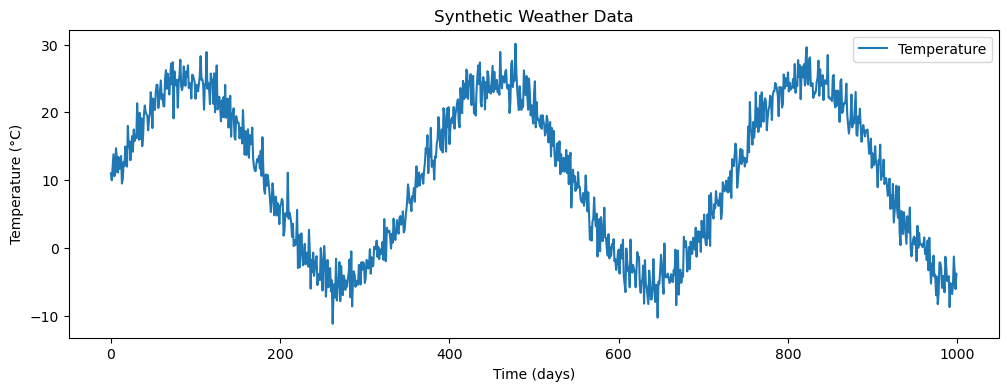

In [3]:
# Plot the synthetic temperature data
plt.figure(figsize=(12, 4))
plt.plot(time, temperature, label="Temperature")
plt.xlabel("Time (days)")
plt.ylabel("Temperature (°C)")
plt.title("Synthetic Weather Data")
plt.legend()
plt.show()

In [5]:
# 2. Preprocess the data
# Scale the data to [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_scaled = scaler.fit_transform(temperature.reshape(-1, 1))

# Create input sequences (windowed data) to predict the next temperature
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # using the past 30 days to predict the next day
X, y = create_sequences(temperature_scaled, seq_length)

In [8]:
X

array([[[0.53686826],
        [0.51236777],
        [0.55668339],
        ...,
        [0.6938207 ],
        [0.65210029],
        [0.67257822]],

       [[0.51236777],
        [0.55668339],
        [0.60532453],
        ...,
        [0.65210029],
        [0.67257822],
        [0.66302751]],

       [[0.55668339],
        [0.60532453],
        [0.52646276],
        ...,
        [0.67257822],
        [0.66302751],
        [0.78728845]],

       ...,

       [[0.30709071],
        [0.21426991],
        [0.14335453],
        ...,
        [0.10616877],
        [0.14007326],
        [0.23986719]],

       [[0.21426991],
        [0.14335453],
        [0.2153769 ],
        ...,
        [0.14007326],
        [0.23986719],
        [0.18306107]],

       [[0.14335453],
        [0.2153769 ],
        [0.17280151],
        ...,
        [0.23986719],
        [0.18306107],
        [0.1236895 ]]])

In [9]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (776, 30, 1)
y_train shape: (776, 1)


In [11]:
# 3. Build the RNN model using Keras
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 4. Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
22/22 [==============================] - 1s 13ms/step - loss: 0.0218 - val_loss: 0.0039
Epoch 2/20
22/22 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0028
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 4/20
22/22 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 5/20
22/22 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 7/20
22/22 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 8/20
22/22 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 9/20
22/22 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 10/20
22/22 [==============================] - 0s 5ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 11/20
22/22 

7/7 [==============================] - 0s 2ms/step


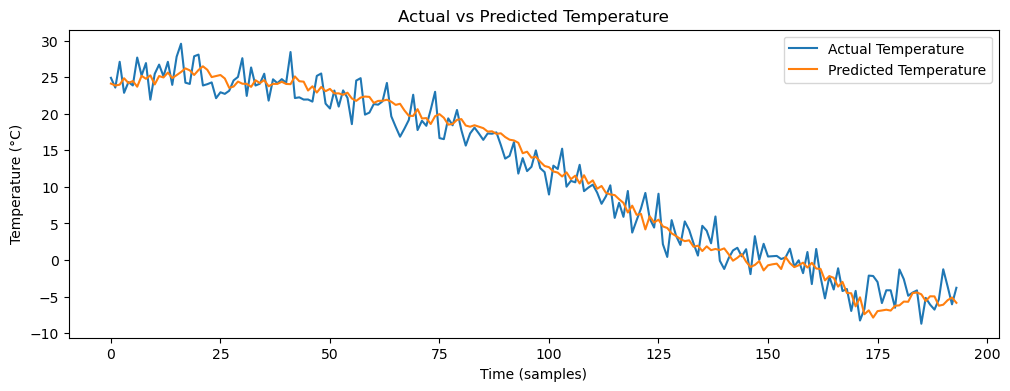

In [13]:
# 5. Evaluate the model and make predictions
predictions = model.predict(X_test)
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test)

# Plot the predictions vs actual temperatures
plt.figure(figsize=(12, 4))
plt.plot(y_test_inv, label='Actual Temperature')
plt.plot(predictions_inv, label='Predicted Temperature')
plt.xlabel("Time (samples)")
plt.ylabel("Temperature (°C)")
plt.title("Actual vs Predicted Temperature")
plt.legend()
plt.show()

In [14]:
# 6. Generate future forecasts (auto-regressive prediction)
def forecast_future(model, last_sequence, num_forecast):
    forecast = []
    current_seq = last_sequence.copy()
    for _ in range(num_forecast):
        # Predict the next temperature
        next_val = model.predict(current_seq[np.newaxis, :, :])
        forecast.append(next_val[0, 0])
        # Append the predicted value and remove the first value of the sequence
        current_seq = np.append(current_seq[1:], [[next_val[0, 0]]], axis=0)
    return np.array(forecast)

1/1 [==============================] - 0s 18ms/step


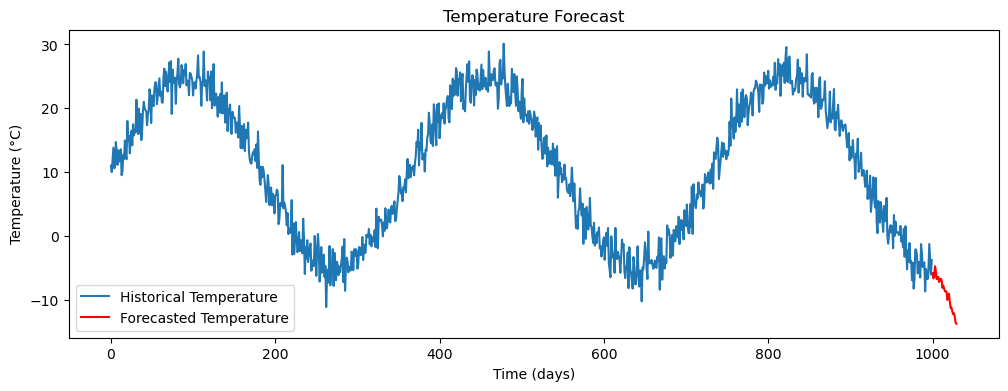

In [15]:
# Use the last available sequence from the training data for forecasting
last_seq = X_test[-1]
future_steps = 30  # forecast next 30 days
forecast_scaled = forecast_future(model, last_seq, future_steps)
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))

plt.figure(figsize=(12, 4))
plt.plot(np.arange(len(temperature)), temperature, label="Historical Temperature")
plt.plot(np.arange(len(temperature), len(temperature) + future_steps), forecast, label="Forecasted Temperature", color='red')
plt.xlabel("Time (days)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Forecast")
plt.legend()
plt.show()